# import necessary library

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(palette='flare')
import statsmodels.api as sm_api
import statsmodels as sm
import yfinance as yf
from datetime import datetime

# download dataset

In [48]:
awal = datetime(year=2018, month=1, day=1)
akhir = datetime(year=2023, month=1, day=1)

In [49]:
stock = yf.download('BBCA.JK', start=awal, end=akhir,)
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,4380.0,4380.0,4380.0,4380.0,3965.377930,0
2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.377930,82303500
2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.377930,68214000
2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225098,76567000
2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000


In [50]:
dataset = pd.DataFrame(stock['Adj Close'])
dataset.head(10)

,Adj Close
Date,
2018-01-01,3965.377930
2018-01-02,3965.377930
2018-01-03,3965.377930
2018-01-04,4024.225098
2018-01-05,4028.751709
2018-01-08,4046.858154
2018-01-09,4078.545410
2018-01-10,4064.965332
2018-01-11,4110.232422


# explarotary data analysis

In [51]:
def adjust(w=5):
    plt.figure(figsize=(16, w), dpi=300)

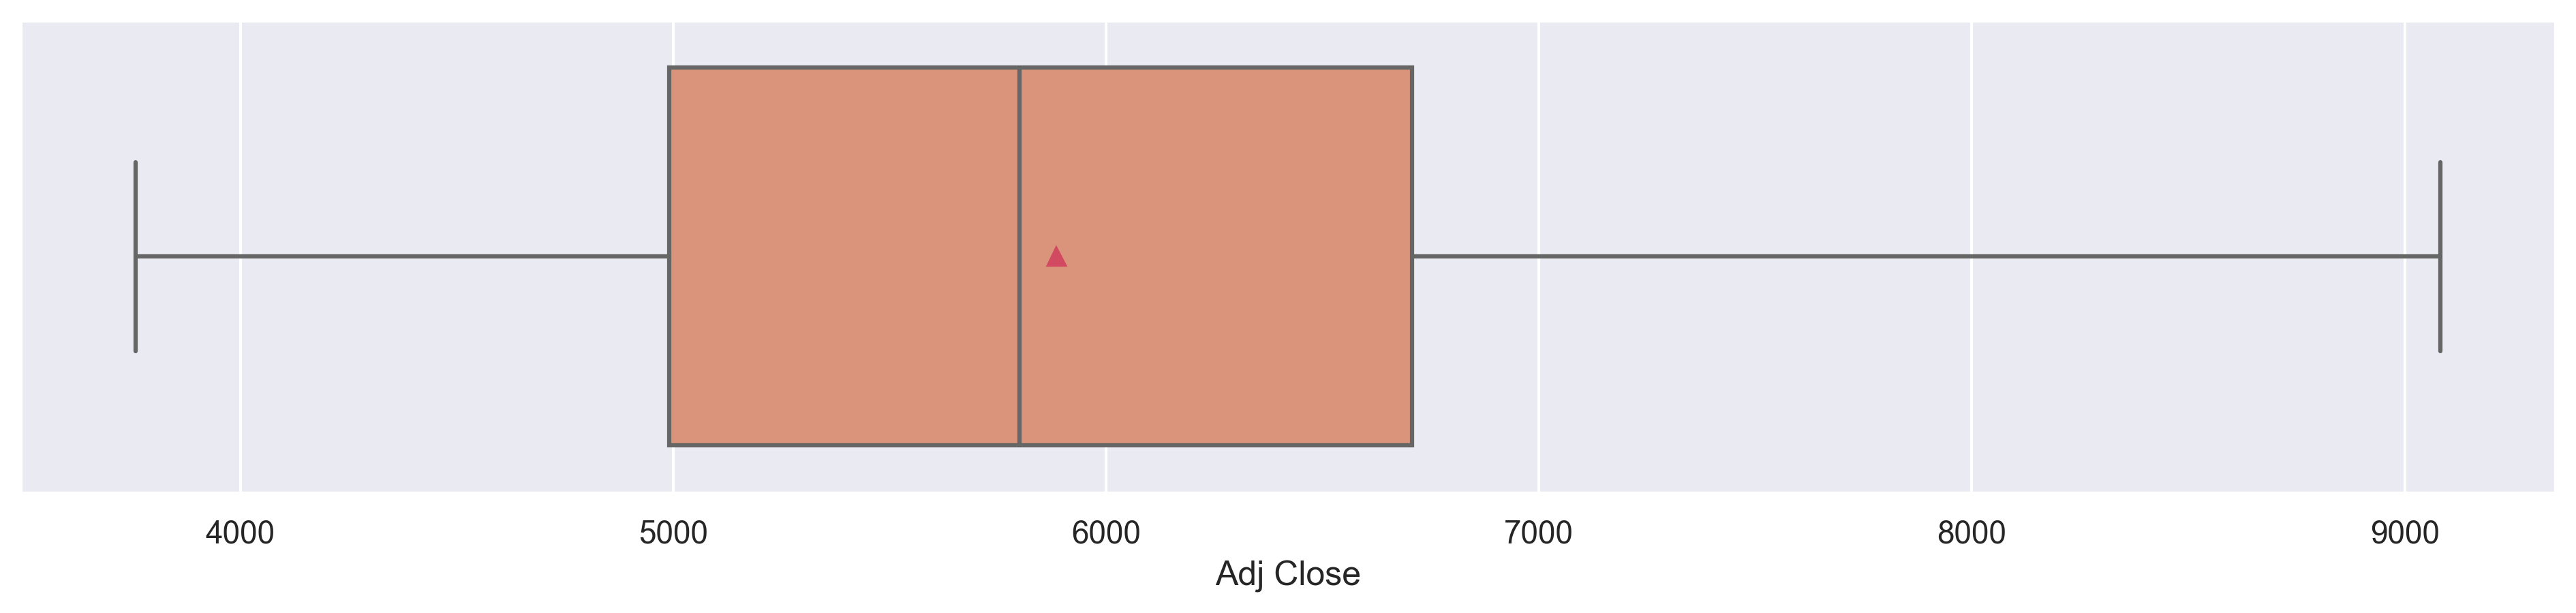

In [52]:
adjust(w=3)
sns.boxplot(x=dataset['Adj Close'], showmeans=True)
plt.show()

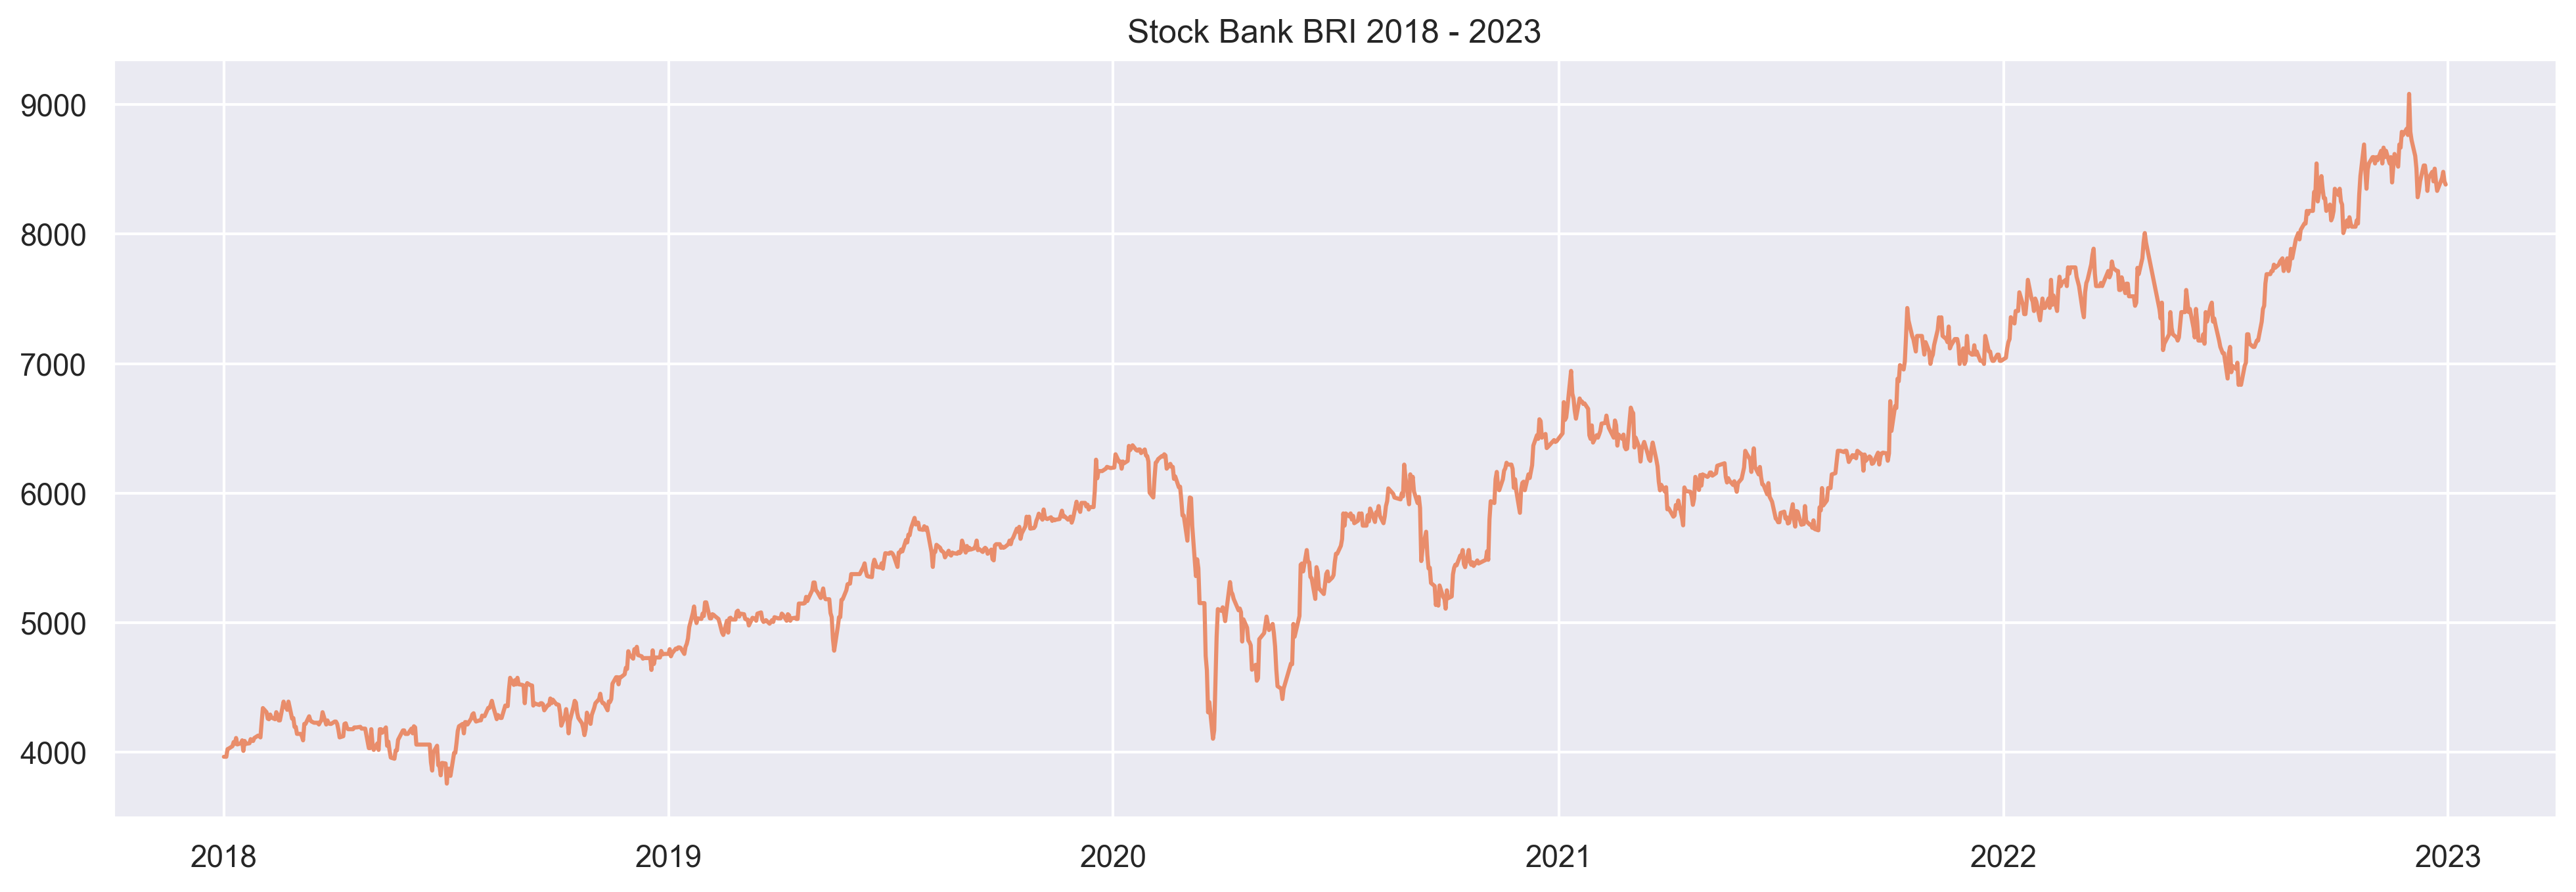

In [53]:
adjust()
plt.plot(dataset.index, dataset['Adj Close'])
plt.title('Stock Bank BRI 2018 - 2023')
plt.show()

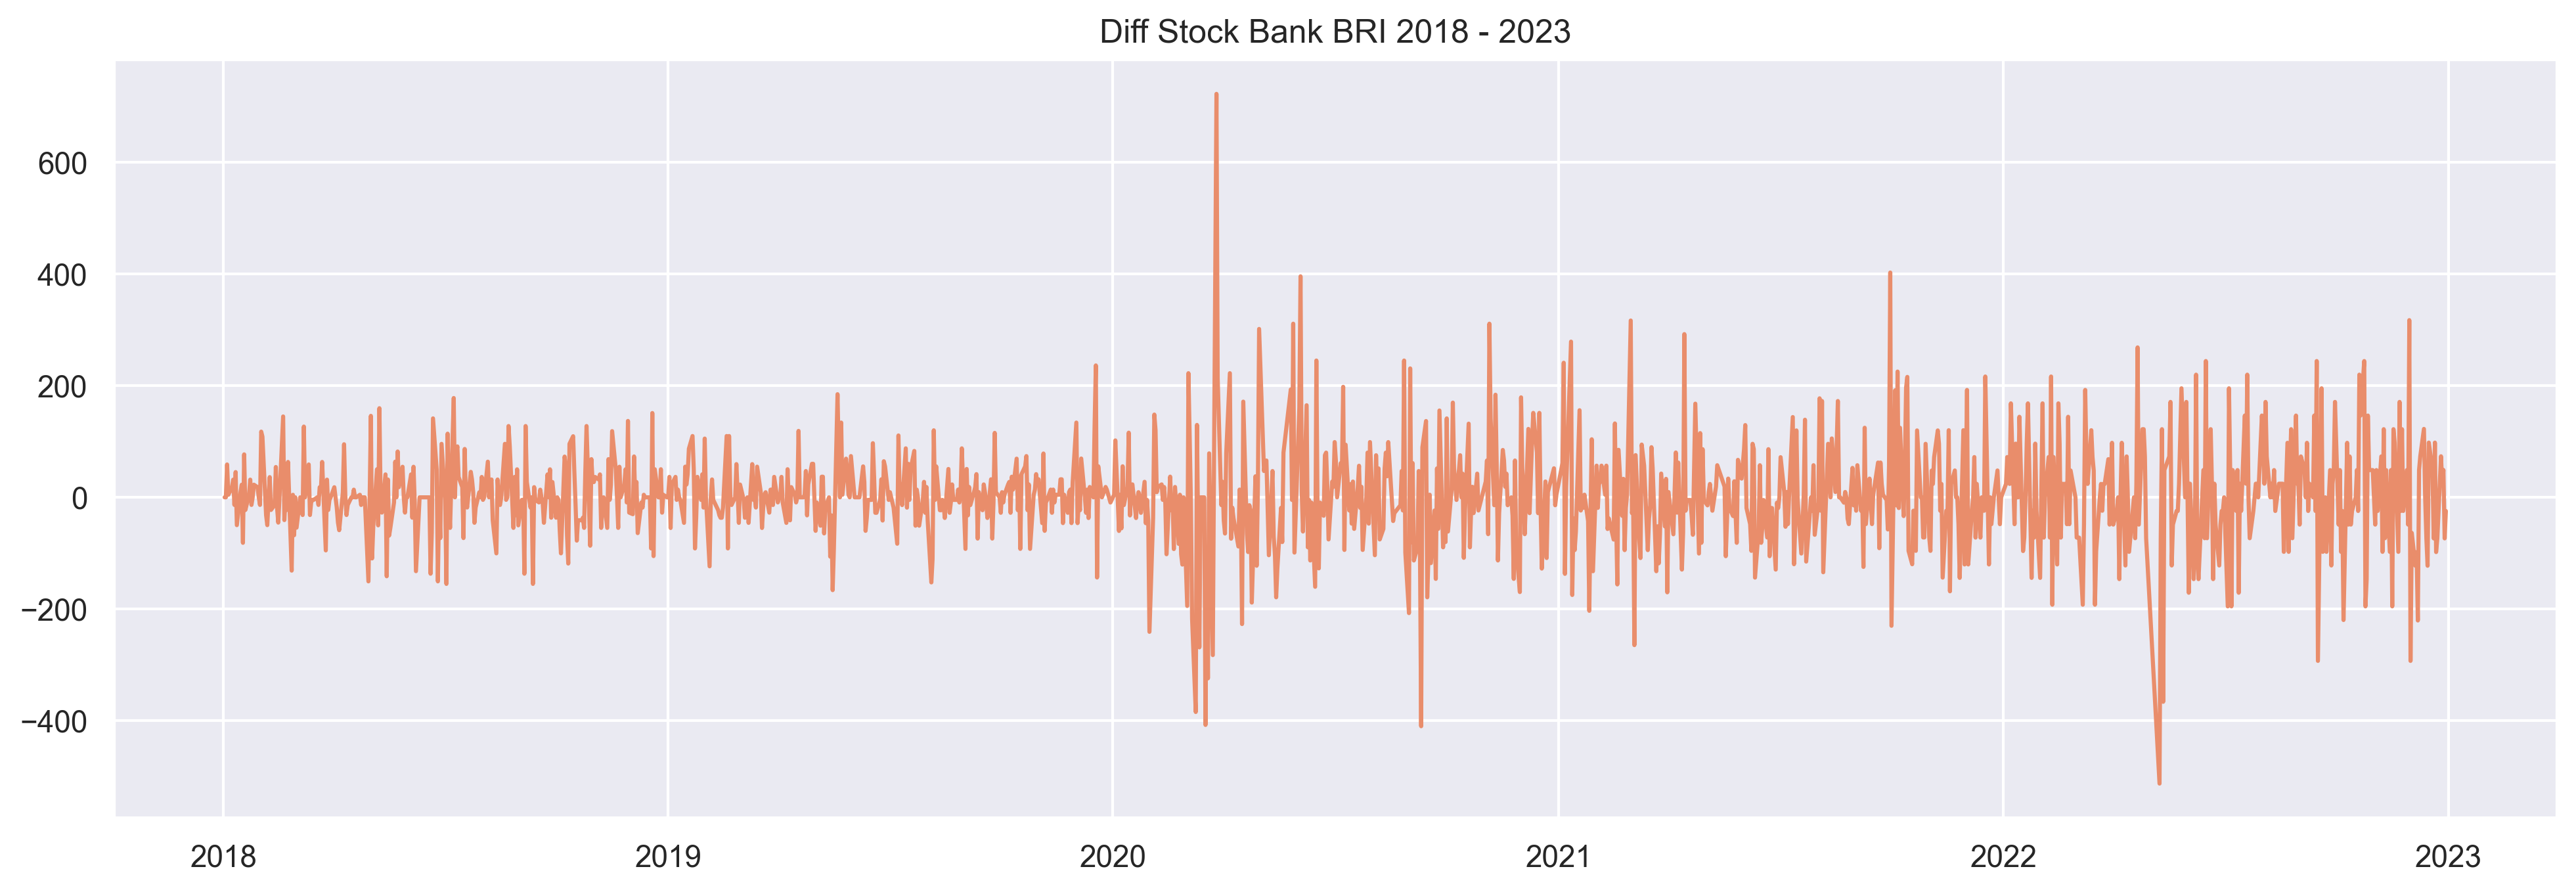

In [62]:
adjust()
plt.plot(dataset.index, dataset['Adj Close'].diff())
plt.title('Diff Stock Bank BRI 2018 - 2023')
plt.show()

In [60]:
stat, p, lag, obs, critical, t = sm_api.tsa.stattools.adfuller(dataset)
if p > 0.05:
    print(f'H0 accepted and data probably has unit root with pvalue {p}')
else:
    print(f'H0 rejected and data probably has no unit root with pvalue {p}')
print(f"""
statictical: {stat}
critical value: {critical}""")

H0 accepted and data probably has unit root with pvalue 0.8194461687204729

statictical: -0.7988959163948673
critical value: {'1%': -3.4355838322867998, '5%': -2.863851267837805, '10%': -2.5680005460145554}


Stasionary is when the data has no unit root.

So the data has a unit root. That means the data is a non-stationary. Now it's possible to see the seasonal decomposition

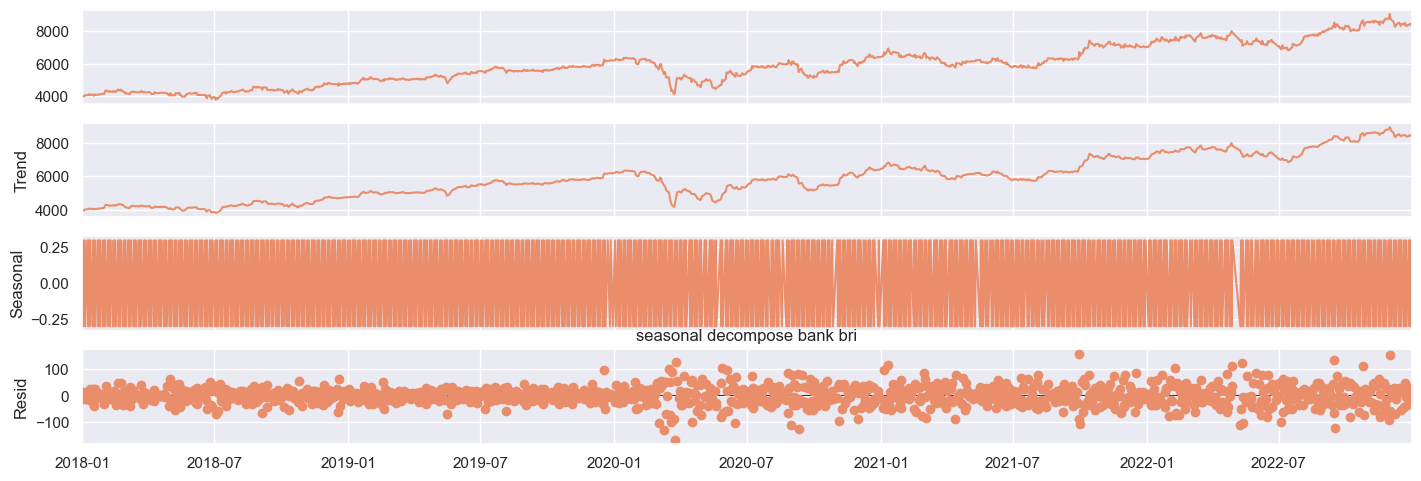

In [55]:
sm.tsa.seasonal.seasonal_decompose(dataset, model='additive', period=2).plot().set_size_inches(w=16, h=5)
plt.title('seasonal decompose bank bri')
plt.show()

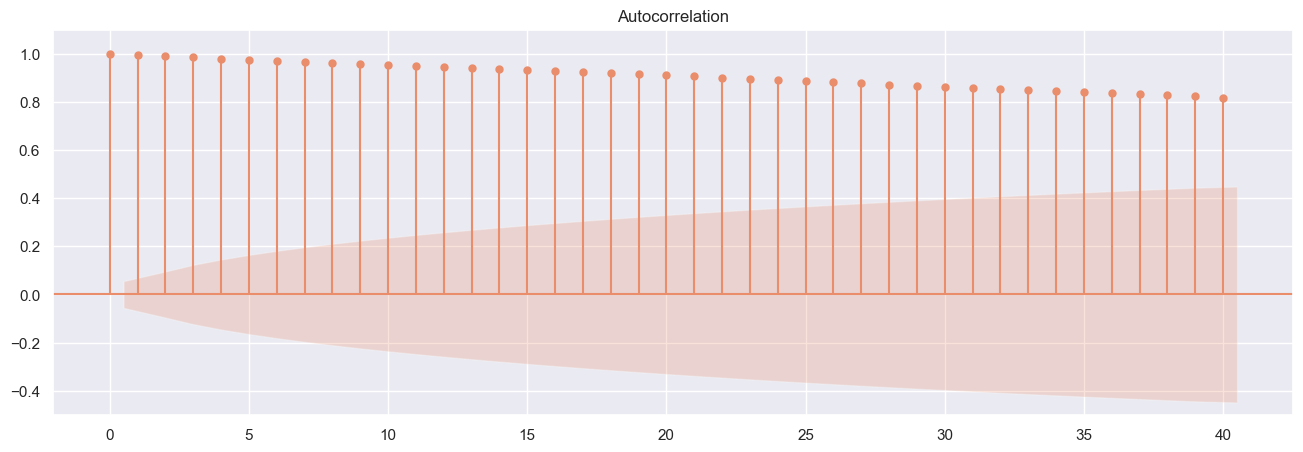

In [56]:
sm_api.graphics.tsa.plot_acf(dataset, lags=40).set_size_inches(w=16, h=5)
plt.ylim(-0.5, 1.1)
plt.show()

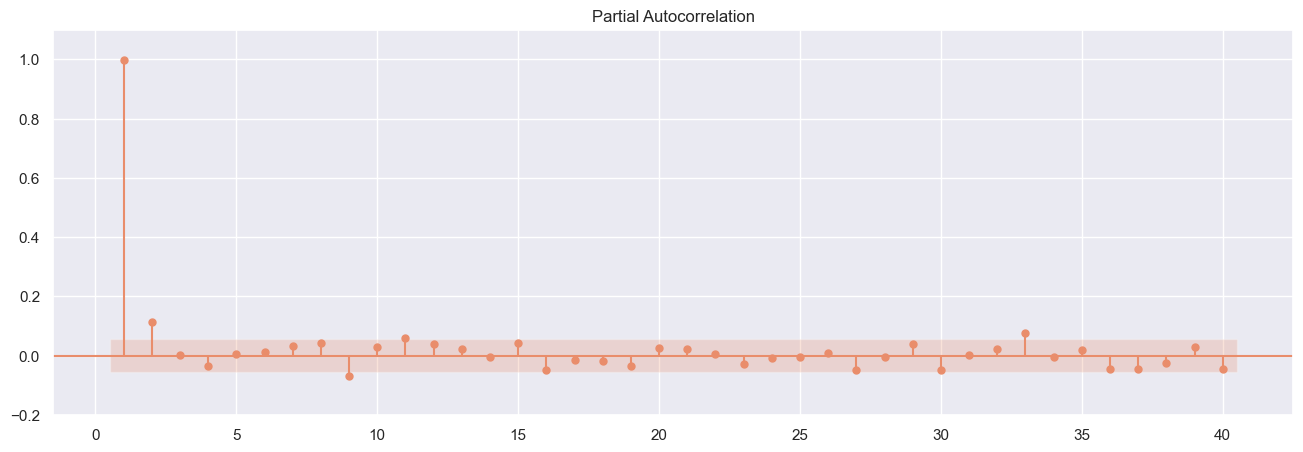

In [57]:
sm_api.graphics.tsa.plot_pacf(dataset, lags=40, alpha=0.05, zero=False, method=('ols')).set_size_inches(w=16, h=5)
plt.ylim(-0.2, 1.1)
plt.show()